In [17]:
!pip install scipy


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline 

### Loading Dataset

In [2]:
df=pd.read_csv('Critical_Habitats.csv')

In [3]:
df.head()

,OBJECTID,SITENAME,COMMSITEID,COMMTYPE,COMMSUBTYP,ACREAGE,LASTVISIT,DATA_METHD,DATA_SOURC,DATA_EQUIP,...,IS_QAQC,GPS_PDOP,GPS_HDOP,GPS_HRZPR,Group_legend,Centroid_X,Centroid_Y,COMLABEL,SHAPE_Length,SHAPE_Area
0,1,Hazel Meadow Pond,0.0,Poor Fen,Shrub Thicket,6.045020,NaN,Aerial Photo Interpretation,CT 2004 Black and White Ortho Photo,Not Applicable,...,True,Not Applicable,Not Applicable,Not Applicable,Palustrine Non-forested,9.803877e+05,875120.113912,PF,2534.096020,-263321.049696
1,2,Matianuck Sand Dunes Natural Area Preserve,1.0,Sand Barren,Pitch Pine Scrub,0.560133,NaN,Aerial Photo Interpretation,CT 2004 Black and White Ortho Photo,Not Applicable,...,True,Not Applicable,Not Applicable,Not Applicable,Terrestrial Non-forested,1.019431e+06,856716.994222,SB,656.142402,-24399.394536
2,3,Matianuck Sand Dunes Natural Area Preserve,2.0,Sand Barren,Pitch Pine Scrub,2.496087,NaN,Aerial Photo Interpretation,CT 2004 Black and White Ortho Photo,Not Applicable,...,True,Not Applicable,Not Applicable,Not Applicable,Terrestrial Non-forested,1.019205e+06,856275.107638,SB,1437.388794,-108729.569153
3,4,McLean Bogs,1.0,Poor Fen,Dwarf Shrub,2.399985,NaN,Aerial Photo Interpretation,CT 2004 Black and White Ortho Photo,Not Applicable,...,True,Not Applicable,Not Applicable,Not Applicable,Palustrine Non-forested,9.816778e+05,896718.592368,PF,1293.661543,-104543.366316
4,5,McLean Bogs,2.0,Poor Fen,Dwarf Shrub,0.823295,NaN,Aerial Photo Interpretation,CT 2004 Black and White Ortho Photo,Not Applicable,...,True,Not Applicable,Not Applicable,Not Applicable,Palustrine Non-forested,9.812146e+05,896341.309986,PF,814.247488,-35862.723251


### Exploratory Data Analysis

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OBJECTID      2972 non-null   int64  
 1   SITENAME      2972 non-null   object 
 2   COMMSITEID    2892 non-null   float64
 3   COMMTYPE      2972 non-null   object 
 4   COMMSUBTYP    2920 non-null   object 
 5   ACREAGE       2972 non-null   float64
 6   LASTVISIT     76 non-null     object 
 7   DATA_METHD    2972 non-null   object 
 8   DATA_SOURC    2971 non-null   object 
 9   DATA_EQUIP    2971 non-null   object 
 10  DATA_EDTR     2972 non-null   object 
 11  DATA_DATE     1069 non-null   object 
 12  ASSOCDATA     2802 non-null   object 
 13  SPECIESDAT    2806 non-null   object 
 14  COMMENTS      2800 non-null   object 
 15  ELCODE        2940 non-null   object 
 16  EONMBR        2791 non-null   object 
 17  IS_QAQC       2972 non-null   bool   
 18  GPS_PDOP      2789 non-null 

In [5]:
print(df.describe())

          OBJECTID   COMMSITEID       ACREAGE    Centroid_X     Centroid_Y  \
count  2972.000000  2892.000000  2.972000e+03  2.972000e+03    2972.000000   
mean   1486.500000     2.546680  1.217433e+01  9.861309e+05  819123.916983   
std     858.086825     8.461333  4.712829e+01  1.146974e+05   89097.596387   
min       1.000000     0.000000  9.200000e-07  7.737720e+05  565273.038069   
25%     743.750000     0.000000  3.586858e-01  9.277610e+05  739226.752005   
50%    1486.500000     0.000000  1.374720e+00  9.806564e+05  840424.696426   
75%    2229.250000     2.000000  5.999298e+00  1.030931e+06  893619.246287   
max    2972.000000    84.000000  8.585361e+02  1.262869e+06  944049.815947   

        SHAPE_Length    SHAPE_Area  
count    2972.000000  2.972000e+03  
mean     3447.909314 -5.303137e+05  
std      7116.987956  2.052908e+06  
min         2.655258 -3.739783e+07  
25%       648.863418 -2.613294e+05  
50%      1422.024565 -5.988280e+04  
75%      3369.732924 -1.562435e+04  
m

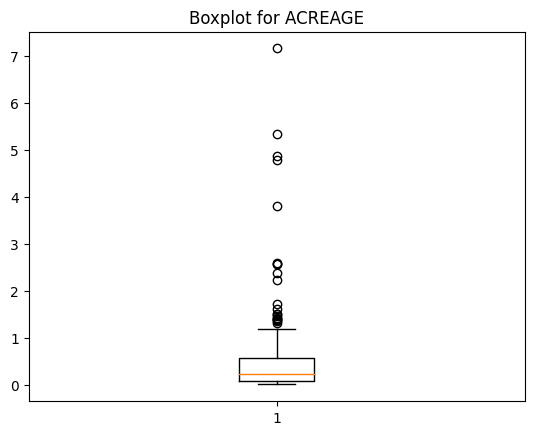

In [10]:
# Identify outliers with boxplots
import matplotlib.pyplot as plt
plt.boxplot(df['ACREAGE'])
plt.title('Boxplot for ACREAGE')
plt.show()

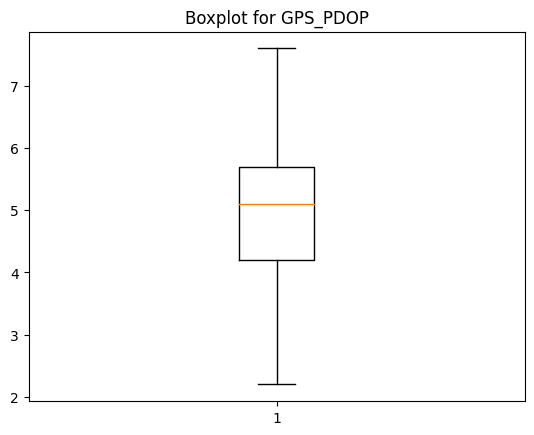

In [11]:
plt.boxplot(df['GPS_PDOP'])
plt.title('Boxplot for GPS_PDOP')
plt.show()

In [12]:
# Correlation matrix
corr = df.corr()
print(corr)

              OBJECTID  COMMSITEID   ACREAGE  IS_QAQC  GPS_PDOP  Centroid_X  \
OBJECTID      1.000000   -0.081768  0.155339      NaN -0.034911   -0.035538   
COMMSITEID   -0.081768    1.000000  0.095318      NaN  0.141619    0.077153   
ACREAGE       0.155339    0.095318  1.000000      NaN  0.323990    0.088308   
IS_QAQC            NaN         NaN       NaN      NaN       NaN         NaN   
GPS_PDOP     -0.034911    0.141619  0.323990      NaN  1.000000    0.244513   
Centroid_X   -0.035538    0.077153  0.088308      NaN  0.244513    1.000000   
Centroid_Y   -0.303098    0.062243 -0.078170      NaN  0.137314   -0.111869   
SHAPE_Length  0.124084    0.076857  0.899597      NaN  0.391413    0.079920   
SHAPE_Area   -0.155339   -0.095318 -1.000000      NaN -0.323990   -0.088308   

              Centroid_Y  SHAPE_Length  SHAPE_Area  
OBJECTID       -0.303098      0.124084   -0.155339  
COMMSITEID      0.062243      0.076857   -0.095318  
ACREAGE        -0.078170      0.899597   -1.000000

C:\Users\ahmad\AppData\Local\Temp\ipykernel_14012\341233180.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

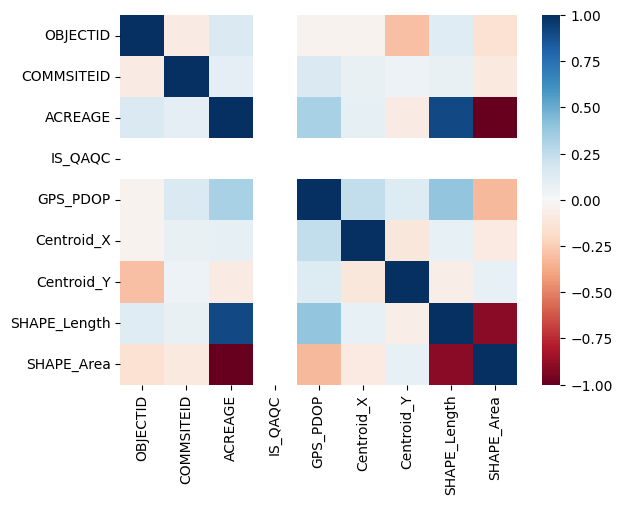

In [13]:
# Visualize correlations
import seaborn as sns
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

### Selecting two numerical columns for analysis

In [6]:
column1 = 'ACREAGE'
column2 = 'GPS_PDOP'

In [7]:
# Ensure they are numeric
df[column1] = pd.to_numeric(df[column1], errors='coerce')
df[column2] = pd.to_numeric(df[column2], errors='coerce')

In [8]:
# Remove NaN values
df = df.dropna(subset=[column1, column2])

In [9]:
# Sample selection
sample1 = df[column1].sample(100)  # Adjust the sample size as needed
sample2 = df[column2].sample(100)


### Point Estimation

In [14]:
# Point estimation
sample1_mean = np.mean(sample1)
print(f'Sample mean of {column1}: {sample1_mean}')

Sample mean of ACREAGE: 0.6257200528000001


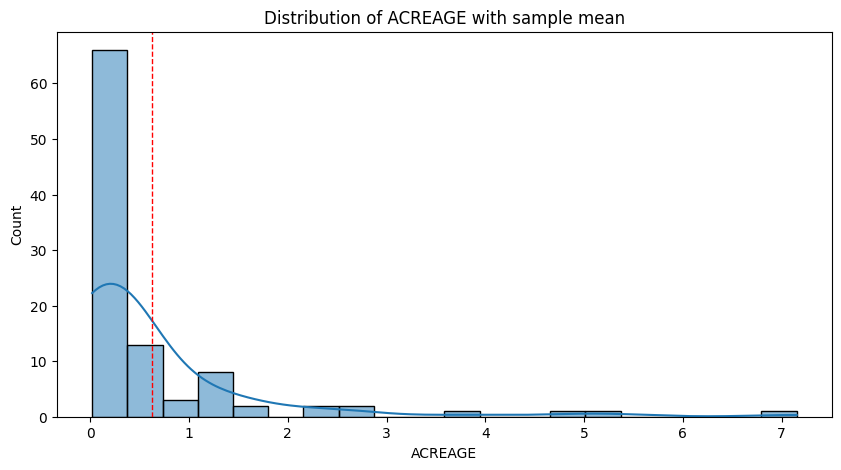

In [15]:
# Visualization for Point estimation
plt.figure(figsize=(10,5))
sns.histplot(sample1, bins=20, kde=True)
plt.axvline(sample1_mean, color='red', linestyle='dashed', linewidth=1)
plt.title(f'Distribution of {column1} with sample mean')
plt.show()


### Confidence Interval

In [22]:
# Confidence interval
confidence = 0.95
degrees_freedom = sample1.size - 1
sample_standard_error = stats.sem(sample1)
confidence_interval = stats.t.interval(confidence, degrees_freedom, sample1_mean, sample_standard_error)
print(f'Confidence interval of {column1}: {confidence_interval}')


Confidence interval of ACREAGE: (0.3996376925977964, 0.8518024130022037)


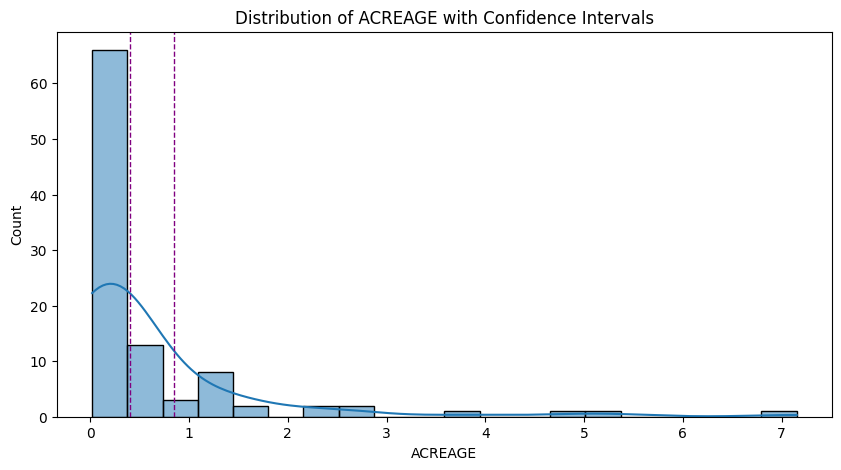

In [23]:
# Visualization for Confidence interval
plt.figure(figsize=(10,5))
sns.histplot(sample1, bins=20, kde=True)
plt.axvline(confidence_interval[0], color='purple', linestyle='dashed', linewidth=1)
plt.axvline(confidence_interval[1], color='purple', linestyle='dashed', linewidth=1)
plt.title(f'Distribution of {column1} with Confidence Intervals')
plt.show()

### Hypothesis Testing

In [24]:
# Null hypothesis: the sample mean is equal to the population mean
population_mean = np.mean(df[column1])
t_statistic, p_value = stats.ttest_1samp(sample1, population_mean)
print(f't statistic: {t_statistic}, p value: {p_value}')

t statistic: 0.3559176686694873, p value: 0.7226595322295959


In [25]:
sample2_mean = np.mean(sample2)
print(f'Sample mean of {column2}: {sample2_mean}')

Sample mean of GPS_PDOP: 4.83


In [26]:
# Repeat the process for the second sample
degrees_freedom = sample2.size - 1
sample_standard_error = stats.sem(sample2)
confidence_interval = stats.t.interval(confidence, degrees_freedom, sample2_mean, sample_standard_error)
print(f'Confidence interval of {column2}: {confidence_interval}')


Confidence interval of GPS_PDOP: (4.637757446320636, 5.022242553679364)


In [27]:
population_mean = np.mean(df[column2])
t_statistic, p_value = stats.ttest_1samp(sample2, population_mean)
print(f't statistic: {t_statistic}, p value: {p_value}')

t statistic: -0.6678166537967547, p value: 0.5058044958855215


### Correlation

In [28]:
# Correlation between the samples
correlation = stats.pearsonr(sample1, sample2)
print(f'Correlation between samples: {correlation}')

Correlation between samples: (0.06073791645643342, 0.5483079693627999)


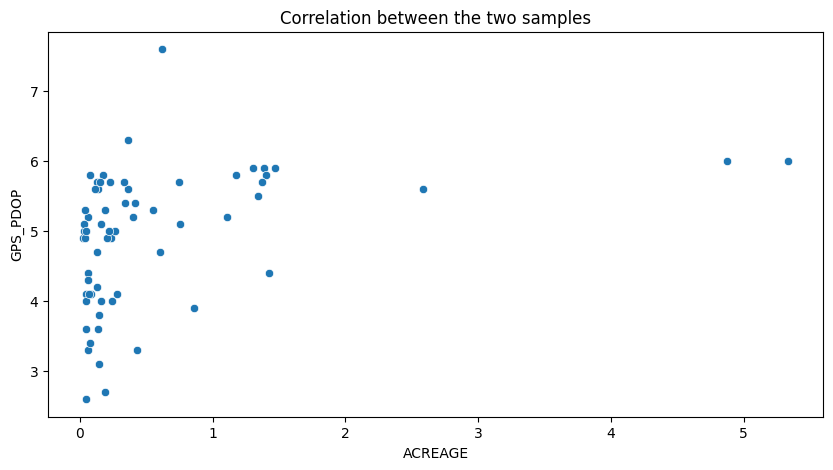

In [29]:
# Visualization for Correlation
plt.figure(figsize=(10,5))
sns.scatterplot(x=sample1, y=sample2)
plt.title('Correlation between the two samples')
plt.show()

### Plotting for data visualization 

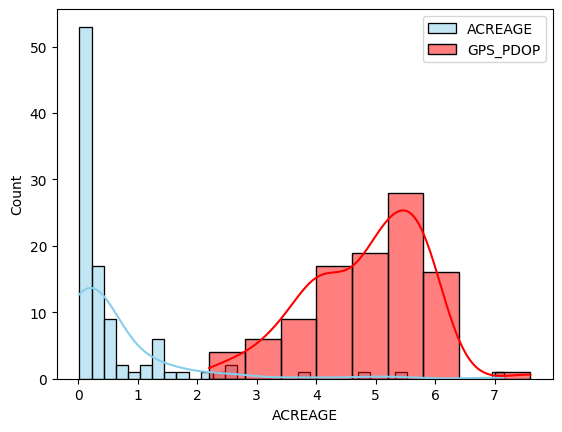

In [30]:
# Histograms of the samples
sns.histplot(sample1, color="skyblue", kde=True, label=column1)
sns.histplot(sample2, color="red", kde=True, label=column2)
plt.legend()
plt.show()
